## This is the notebook of SEIR models specific looking at COVID-19 scenarios
### SEIR model

The SEIR model is the extended version of basic SIR model by adding another population portion showing the individuals who have been exposed to the virus but have not infected yet.

The diagram is shown as:
$$\text{Susceptible} (S)
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} (E)
\xrightarrow{\alpha E} 
\text{Infectious} (I)
\xrightarrow{\gamma I} 
\text{Recovered} (R) $$

The equation of the deterministic SEIR model is shown below:

\begin{align*}
\frac{dS}{dt} & = -\beta S I \\
\frac{dE}{dt} & = \beta S I - \alpha E \\
\frac{dI}{dt} & = \alpha E  - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

where $s + e + i + r = 1$.


In [1]:
import numpy as np
from epidemic_models.MSEIR import seirSim
from epidemic_models.MSEIR import plot_trajectory
import matplotlib.pyplot as plt

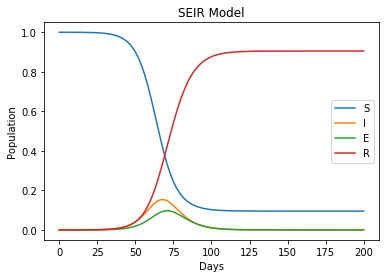

In [4]:
# initial conditions
# parameter values
R0 = 2.6 # basic reproduction number for covid - how infective the disease is 
# Based on CDC, the median incubation time for COVID-19 is about 4-5 days 
incubation = 5
infective = 3.3

# initial number of infected and recovered individuals as fractions
N = 20000
e0 = 1/N
i0 = 0.00
r0 = 0.00
s0 = 1 - e0 - i0 - r0
y0 = np.array([s0, e0, i0, r0])

alpha = 1/incubation
gamma = 1/infective
beta = R0*gamma
t=np.linspace(0, 200, 200)

seir_result = seirSim(y0, beta, alpha, gamma, t, showPlot=True)

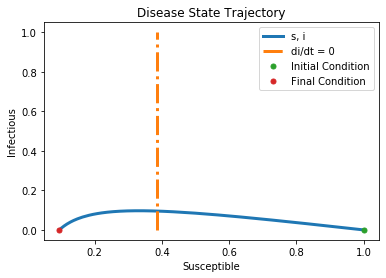

In [5]:
# plot disease progression trajectory
s, e, i, r = seir_result.T
plot_trajectory(t, R0, s, i, e=None)

## Compare disease trajetories with different covid variants 

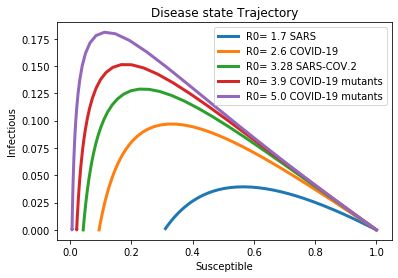

In [9]:
R0s = np.array([1.7, 2.6, 3.28, 3.9, 5])
annots = ["SARS", "COVID-19", "SARS-COV.2", "COVID-19 mutants", "COVID-19 mutants"]
j = 0

for it in R0s:
    beta = it*gamma
    result = seirSim(y0, beta, alpha, gamma, t, showPlot=False)
    
    s_t, e_t, i_t, r_t = result.T
    plt.plot(s_t, i_t, lw=3, label= "R0= " + str(it) + " " + annots[j])
    j = j+1
    
plt.title('Disease state Trajectory')
plt.xlabel('Susceptible')
plt.ylabel('Infectious')
plt.legend()

## How social distance affect disease spread